<a href="https://www.kaggle.com/code/adityasudish1/eda-and-data-preprocessing?scriptVersionId=232788487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-and-attendance-dataset/teacher_parent_communication.csv
/kaggle/input/student-performance-and-attendance-dataset/homework.csv
/kaggle/input/student-performance-and-attendance-dataset/performance.csv
/kaggle/input/student-performance-and-attendance-dataset/attendance.csv
/kaggle/input/student-performance-and-attendance-dataset/students.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import time
from datetime import datetime as dt

Importing all the datasets:
1) Attendance
2) Homework
3) Performance
4) Students
5) Teacher Parent Communication

In [3]:
attendance = pd.read_csv('/kaggle/input/student-performance-and-attendance-dataset/attendance.csv')
attendance.head(3)

,Student_ID,Date,Subject,Attendance_Status
0,S06592,2024-09-20,Arabic,Present
1,S01777,2025-01-22,Math,Present
2,S07362,2024-12-03,Geography,PRESENT


In [4]:
homework = pd.read_csv('/kaggle/input/student-performance-and-attendance-dataset/homework.csv')
homework.head(3)

,Student_ID,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
0,S12002,Science,Record.,2024-09-10,❌,C-,Yes
1,S01255,History,Head baby.,2024-10-16,❌,A+,No
2,S04968,Arabic,Keep audience medical free.,2025-02-11,Done,A+,Yes


In [5]:
performance = pd.read_csv('/kaggle/input/student-performance-and-attendance-dataset/performance.csv')
performance.head(3)

,Student_ID,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
0,S00396,Arabic,76,90,Possible I large perhaps onto impact pretty ag...
1,S06544,Math,91,100%,Attention very once light speak yeah against c...
2,S01277,Science,92,100%,Something piece phone wish rich these where ca...


In [6]:
students = pd.read_csv('/kaggle/input/student-performance-and-attendance-dataset/students.csv')
students.head(3)

,Student_ID,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
0,S00001,Donna Williams,2007-02-10,Grade 3,781-534-4258x9046
1,S00002,John Stafford,2014-11-26,Grade 5,+1-782-691-6291x99704
2,S00003,Chad Harper,2017-02-07,Grade 3,308.517.3750


In [7]:
teacher_parent_communication = pd.read_csv('/kaggle/input/student-performance-and-attendance-dataset/teacher_parent_communication.csv')
teacher_parent_communication.head(3)

,Student_ID,Date,Message_Type,Message_Content
0,S01133,2025-01-20,Automated Reminder,Cut authority ball must cut to maintain think ...
1,S11179,2024-11-16,Parent to Teacher,Far baby different conference evening gas floo...
2,S09537,2024-12-03,Parent to Teacher,According this reality reality wish join seaso...


First, lets see the distribution of students across grades using the students dataset

In [8]:
students.head(3)

,Student_ID,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
0,S00001,Donna Williams,2007-02-10,Grade 3,781-534-4258x9046
1,S00002,John Stafford,2014-11-26,Grade 5,+1-782-691-6291x99704
2,S00003,Chad Harper,2017-02-07,Grade 3,308.517.3750


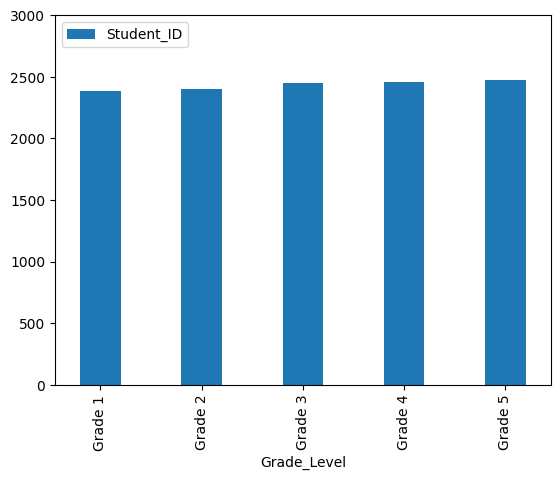

In [9]:
fig, ax = plt.subplots()
cols = ['Grade_Level','Student_ID']
grade_level_counts = students[cols].groupby(['Grade_Level']).count()
grade_level_counts.plot(kind='bar',width=0.4, ax=ax)
ax.set_ylim(0, 3000);
plt.legend(loc='upper left');

It seems that the number of students in each grade is almost the same. Lets find out how many subjects are there and which subjects had the highest daily attendance on average

In [10]:
attendance.head(3)

,Student_ID,Date,Subject,Attendance_Status
0,S06592,2024-09-20,Arabic,Present
1,S01777,2025-01-22,Math,Present
2,S07362,2024-12-03,Geography,PRESENT


In [11]:
attendance['Date'][0] ### NEEDS TO BE CONVERTED TO DATETIME

'2024-09-20'

In [12]:
attendance['Date'] = pd.to_datetime(attendance['Date'])

In [13]:
attendance.Subject.unique().tolist()

['Arabic', 'Math', 'Geography', 'Science', 'History', 'English']

In [14]:
attendance.Attendance_Status.unique()

array(['Present', 'PRESENT ', 'excused', ' late', 'Absent', 'left early',
       'Late', 'absnt'], dtype=object)

We can see that there are many different types of statuses in the column above. This data needs to be cleaned and standardized for our needs. Lets clean this data and convert the column into binary where :\
Present = 1\
Absent = 0

In [15]:
present_ = ['Present', 'PRESENT ', 'excused', ' late', 'left early', 'Late']

In [16]:
attendance['Attendance_Status'] = np.where(attendance['Attendance_Status'].isin(present_),1,0) 


In [17]:
attendance.head(3)

,Student_ID,Date,Subject,Attendance_Status
0,S06592,2024-09-20,Arabic,1
1,S01777,2025-01-22,Math,1
2,S07362,2024-12-03,Geography,1


In [18]:
## GROUPING BY SUBJECT AND DATE TO GET THE SUBJECT-WISE DAILY ATTENDANCE
subject_daily_attendance = attendance.groupby(['Subject','Date'],as_index=False).sum()
subject_daily_attendance.head(5)

,Subject,Date,Student_ID,Attendance_Status
0,Arabic,2024-03-09,S08742S06951S08905S07259S02181S08397S06250S121...,141
1,Arabic,2024-03-10,S08305S01348S01396S04146S03674S00985S04022S043...,121
2,Arabic,2024-03-11,S06236S06441S09573S03464S06690S04925S01749S109...,145
3,Arabic,2024-03-12,S10436S07084S00948S09635S06780S02146S00318S056...,132
4,Arabic,2024-03-13,S04410S02433S09751S02019S06487S01467S08271S112...,139


In [19]:
subject_daily_attendance.groupby(['Subject']).mean(['Attendance_Status'])

,Attendance_Status
Subject,
Arabic,124.142077
English,124.532787
Geography,124.153005
History,124.057377
Math,125.346995
Science,124.901639


From the above analysis, we can see that on average the attendance is more or less the same in all the classes, this could be because multiple subjects are taught on the same day , hence **daily attendance remains the same for each subject**

Now lets see the maximum, minimum and average marks of all students in each subject using the performance dataset

In [20]:
performance.head(3)

,Student_ID,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
0,S00396,Arabic,76,90,Possible I large perhaps onto impact pretty ag...
1,S06544,Math,91,100%,Attention very once light speak yeah against c...
2,S01277,Science,92,100%,Something piece phone wish rich these where ca...


In [21]:
performance.dtypes

Student_ID               object
Subject                  object
Exam_Score                int64
Homework_Completion_%    object
Teacher_Comments         object
dtype: object

The column - 'Homework_Completion_%' needs to be float/numeric as well but it is a string currently. Lets modify this column using regex to remove special characters such as '%' and '-'

In [22]:
import regex as re

def remove_special_chars(x):
    # REPLACING NEGATIVE HOMEWORK COMPLETION VALUES WITH 0 
    if '-' in x:
        x = '0'
    x_new = re.sub('[^A-Za-z0-9]+', '', x)
    return x_new

performance['Homework_Completion_%'] = pd.to_numeric(performance['Homework_Completion_%'].apply(lambda x: remove_special_chars(x)) )

In [23]:
performance['Homework_Completion_%'].describe()

count    36468.000000
mean        72.822063
std         37.260507
min          0.000000
25%         80.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Homework_Completion_%, dtype: float64

In [24]:
performance.describe()

,Exam_Score,Homework_Completion_%
count,36468.000000,36468.000000
mean,74.964243,72.822063
std,20.538704,37.260507
min,40.000000,0.000000
25%,57.000000,80.000000
50%,75.000000,90.000000
75%,93.000000,95.000000
max,110.000000,100.000000


We can see that Exam_Score has max values greater than 100 which is not possible , so we need to replace all values > 100 with 100 

In [25]:
# REPLACING VALUES GREATER THAN 100 with the max value 100
performance['Exam_Score'] = np.where(performance['Exam_Score']>100,100,performance['Exam_Score'])

In [26]:
performance.groupby(['Subject']).agg(
    {'Exam_Score':['min','max','mean'],
     'Homework_Completion_%':['min','max','mean']
    })

Exam_Score                 Homework_Completion_%                
                 min  max       mean                   min  max       mean
Subject                                                                   
Arabic            40  100  74.190392                     0  100  72.672719
English           40  100  74.394672                     0  100  72.813172
Geography         40  100  73.847254                     0  100  73.117396
History           40  100  74.328993                     0  100  72.640628
Math              40  100  73.964540                     0  100  72.207125
Science           40  100  74.412112                     0  100  73.476120

The max values for each subject has been set to 100 and we see that the average exam scores for each subject is ~74 and average homework completion % is approximately 72.5%\

Lets explore teacher-parent communication data to see if there are any meaningful inferences

In [27]:
teacher_parent_communication.head(3)

,Student_ID,Date,Message_Type,Message_Content
0,S01133,2025-01-20,Automated Reminder,Cut authority ball must cut to maintain think ...
1,S11179,2024-11-16,Parent to Teacher,Far baby different conference evening gas floo...
2,S09537,2024-12-03,Parent to Teacher,According this reality reality wish join seaso...


In [28]:
teacher_parent_communication['Message_Type'].unique()

array(['Automated Reminder', 'Parent to Teacher', 'Teacher to Parent'],
      dtype=object)

Lets see how many parents reach out to the teacher on average

In [29]:
# CREATING A FLAG TO DETERMINE HOW MANY TIMES PARENTS CONTACTED THE TEACHER
teacher_parent_communication['Parent_Teacher_flag'] = np.where(teacher_parent_communication['Message_Type']=='Parent to Teacher',1,0)

In [30]:
teacher_parent_communication['Parent_Teacher_flag'].sum()/teacher_parent_communication['Student_ID'].nunique()

0.7664573820395738

Therefore, we can confidently say that for every 3 out of 4 students, their parents contact the teacher and sent a message\
Now lets see what the most commonly discussed topic was in the messages.

In [31]:
teacher_parent_communication['Message_Content'][:3]

0    Cut authority ball must cut to maintain think ...
1    Far baby different conference evening gas floo...
2    According this reality reality wish join seaso...
Name: Message_Content, dtype: object

In [32]:
# REMOVING ALL THE '.' FROM THE STRINGS
# SPLITTING ALL THE SENTENCES{STRINGS} INTO A LIST OF WORDS 
# THEN CONCATENATING ALL OF THEM TOGETHER
all_words = teacher_parent_communication['Message_Content'].str.replace('.','').str.split(' ').sum()

In [33]:
all_words[:10]

['Cut',
 'authority',
 'ball',
 'must',
 'cut',
 'to',
 'maintain',
 'think',
 'support',
 'Far']

In [34]:
# Using Counter to calculate the number of occurrences of words in all_words
from collections import Counter

count = dict(Counter(all_words))


In [35]:
# Putting the data into a dataframe and sorting it
df = pd.DataFrame(data=count.values(), index=count.keys()).rename({0:'count'},axis=1).sort_values(by='count',ascending=False)
df.head(3)

,count
,3681
Democrat,386
watch,374


In [36]:
df.index[1:11]

Index(['Democrat', 'watch', 'model', 'that', 'crime', 'seek', 'federal', 'way',
       'up', 'first'],
      dtype='object')

The top 10 words that were most used in the messages between teachers and parents were :\
['Democrat', 'watch', 'model', 'that', 'crime', 'seek', 'federal', 'way',
       'up', 'first']